### Creating fake data 

In [16]:
# importing the library with which we will create the data 
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 200

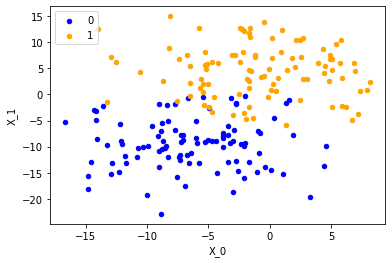

In [17]:
# Importing the libraries
from matplotlib import pyplot as plt
from pandas import DataFrame 
# Converting the data to a dataframe
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
# making the plot
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

### Creating the sigmoid function which we will need later

In [18]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Code to make the forward propagation

In [19]:
def hx(w,X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

### Defining the cost function 

In [20]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

### Defining the Gradient descent 


In [21]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return g

In [22]:
CostList = []
def descent(w_new, w_prev, lr):
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        CostList.append(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>100: 
            return w_new
        j+=1

In [23]:
w=[1,1,1]

### Train the model 

In [25]:
w = descent(w,w,.0099)
print(CostList[0:5])

[112.81815690482537, 168.5749357223354, 75.77036936925771, 67.88063552779857, 49.631255078140065]


In [36]:
print(w)

[3.949771651584226, 0.7040638727311413, 0.9962043038856238]


In [26]:
print(len(CostList))

204


In [27]:
X.shape

(200, 2)

In [28]:
Y.shape

(200,)

### Plotting a graph with the CostList

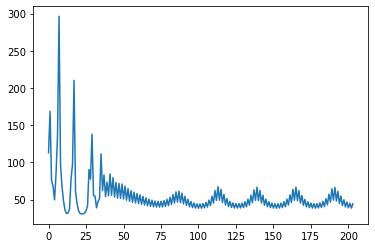

In [62]:
x_axis = list(range(204))
fig = plt.figure()
ax = plt.axes()
ax.plot(x_axis,CostList)

### Visualize the decision boundary on training set

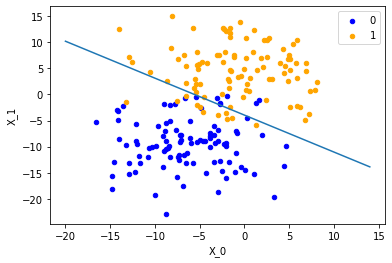

In [30]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

### Generating Final Prediction

In [53]:
y_pred_final = (hx(w,X))
print(y_pred_final.shape)

(200,)


### Changing the values greater than 0.5 to 1 and lower than 0.5 to 0

In [55]:
# Taking 0.5 as the threshold value
for i in range(200):
    if y_pred_final[i]>0.5:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [56]:
print(y_pred_final)

[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0.]


### Checking the accuracy score

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,y_pred_final))

0.915


### Sci-kit Learn Implementation

Till now we have completely focused on creating our logistic regression model and then making prediction with its help from scratch. We have also calculated the accuracy score using our logistic regression model, now we will train the dataset using the logistic regression function of sklearn, and we will also calculate the accuracy score to see if our model is close or not. 

In [58]:
# Calling the required Library
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)
# Making the prediction
y_pred_sklearn = clf.predict(X)

In [59]:
#calculaing the accuracy score
accuracy_score(Y, y_pred_sklearn)

0.91

On comparing the accuracy from both the models we find that they are almost similar, infact our model performed a little bit better. 